In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from preprocess import preprocess_text
from preprocess import clean_df


In [2]:
X_train = pd.read_csv("Poem_classification - train_data.csv")
X_test = pd.read_csv("Poem_classification - test_data.csv")

X_train.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [3]:

print(X_train["Genre"].unique())


['Music' 'Death' 'Affection' 'Environment']


In [18]:

print(X_test["Genre"].value_counts())

Genre
Affection      100
Environment     25
Death           13
Music           12
Name: count, dtype: int64


(array([239.,   0.,   0., 234.,   0.,   0., 141.,   0.,   0., 227.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

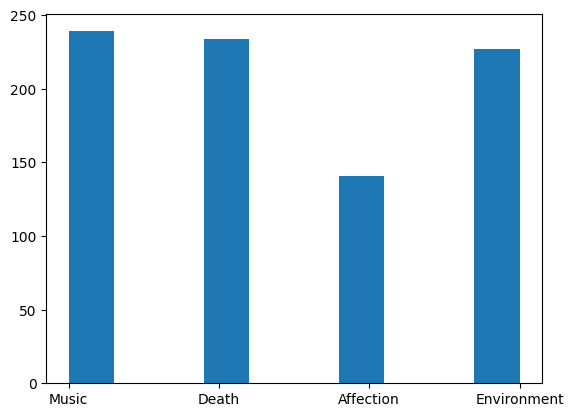

In [5]:
plt.hist(X_train["Genre"])  


In [6]:
X_train

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


In [7]:
X_train

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


In [8]:
X_train = clean_df(X_train)
X_test = clean_df(X_test)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

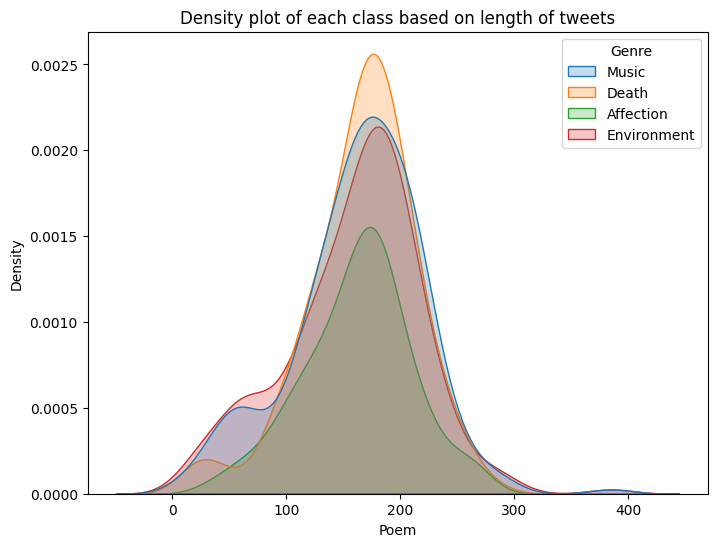

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))


sns.kdeplot(data = X_train, x = X_train["Poem"].str.len(), hue = "Genre", fill = "True" ) # Show density plot for each categories compared to the length of the tweet

plt.title("Density plot of each class based on length of tweets")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # instantiate a label encoder 
X_train['Genre_enc'] = label_encoder.fit_transform(X_train['Genre']) # fit and transform the encoder on labels
X_test['Genre_enc'] = label_encoder.fit_transform(X_test['Genre']) # fit and transform the encoder on labels

In [11]:
y_train = X_train.Genre_enc
y_test = X_test.Genre_enc

In [15]:
print(X_test)

           Genre                                               Poem  Genre_enc
0          Music  woman walk bench sitting onwith dog look part ...          3
1          Music  boy untouchability beautyis subject already bo...          3
2          Music  today leave world embody prominence within eve...          3
3          Music  big bend say call mountain wall must river nev...          3
4          Music  put shell along lip last summer dinner dog eat...          3
..           ...                                                ...        ...
145  Environment  pick tulip garden red one put desk small blue ...          2
146  Environment  cloud veil midnight moon restlessly speed glea...          2
147  Environment  pulled spider web took another bull relaxed bu...          2
148  Environment         whose wood think know house village though          2
149  Environment  make maple blazejust stopping look set clock b...          2

[150 rows x 3 columns]


In [20]:
from model_class import Model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC

class_labels = ["Affection","Death","Environment","Music"]

tfidf_model = Model(X_train["Poem"],y_train,X_test["Poem"],y_test, LogisticRegression(),TfidfVectorizer, class_labels) # Instanciate the model class
tfidf_model.fit() # Fitting the model
y_pred = tfidf_model.predict() # Make the predictions
class_labels=label_encoder.inverse_transform(range(4))

tfidf_model.report(y_pred,class_labels) # Show report on model performances

              precision    recall  f1-score   support

   Affection       0.89      0.16      0.27       100
       Death       0.07      0.23      0.11        13
 Environment       0.28      0.44      0.34        25
       Music       0.09      0.42      0.15        12

    accuracy                           0.23       150
   macro avg       0.34      0.31      0.22       150
weighted avg       0.65      0.23      0.26       150

